In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json

In [2]:
import json

with open("energies.json", "r") as f:
    data = json.load(f)

dOHs = [200, 275, 350, 425, 500]
    
hams = {
    "1.9": [f"19_{dOH}_mean.json" for dOH in dOHs],
    "2.6": [f"26_{dOH}_mean.json" for dOH in dOHs],
    "3.3": [f"33_{dOH}_mean.json" for dOH in dOHs],
}

energy_keys = ["HF_energy", "DMRG_energy_2", "DMRG_energy_16", "FCI_energy", "QSCI_noisy_energy"]

results = {k: {ek: [] for ek in energy_keys} for k in hams}

for bond_length, hams in hams.items():
    for ham in hams:
        for ek in energy_keys:
            results[bond_length][ek].append(data[ham][ek])


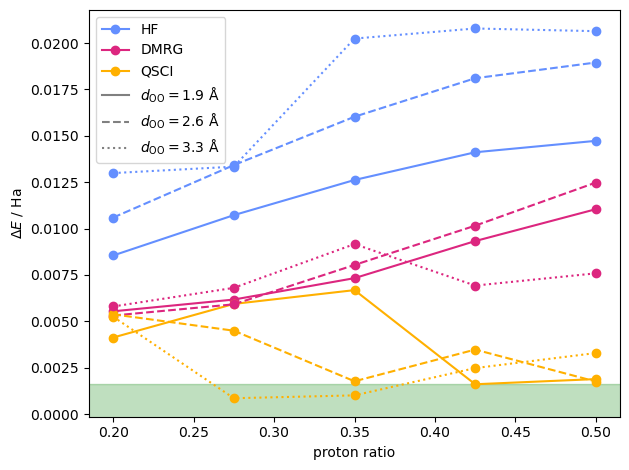

In [3]:
r = np.array(dOHs) / 1000

plotlist = [
    [1.9, 'solid'],
    [2.6, 'dashed'],
    [3.3, 'dotted'],
]

for el in plotlist:
    dOO = el[0]

    sol_hf = np.array(results[str(dOO)]['HF_energy'])
    sol_dmrg2 = np.array(results[str(dOO)]['DMRG_energy_2'])
    sol_fci = np.array(results[str(dOO)]['FCI_energy'])
    sol_qsci = np.array(results[str(dOO)]['QSCI_noisy_energy'])

    if dOO == 1.9:
        plt.plot(r, sol_hf - sol_fci, label='HF', 
                 color='#648FFF', linestyle=el[1], marker='o')
        plt.plot(r, sol_dmrg2 - sol_fci, label='DMRG', 
                 color='#DC267F', linestyle=el[1], marker='o')
        plt.plot(r, sol_qsci - sol_fci, label='QSCI', 
                 color='#FFB000', linestyle=el[1], marker='o')
    else:
        plt.plot(r, sol_hf - sol_fci, color='#648FFF',
                 linestyle=el[1], marker='o')
        plt.plot(r, sol_dmrg2 - sol_fci, color='#DC267F',
                 linestyle=el[1], marker='o')
        plt.plot(r, sol_qsci - sol_fci, color='#FFB000', 
                 linestyle=el[1], marker='o')

xlim = plt.xlim()
ylim = plt.ylim()

plt.fill([0,1,1,0], [-1,-1,1.6/1000,1.6/1000], color='green', alpha=0.25)

plt.xlim(xlim)
plt.ylim(ylim)

plt.xlabel('proton ratio')
plt.ylabel(r'Δ$E$ / Ha')

plt.plot([], [], label=r'$d_{\mathrm{OO}} = 1.9$ Å', 
         linestyle='solid', color='grey')
plt.plot([], [], label=r'$d_{\mathrm{OO}} = 2.6$ Å',
         linestyle='dashed', color='grey')
plt.plot([], [], label=r'$d_{\mathrm{OO}} = 3.3$ Å',
         linestyle='dotted', color='grey')

plt.legend()
plt.tight_layout()
plt.savefig('hardware_results.pdf')
plt.show()